In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('./manual_score.csv')
print(df.shape[0])

324


In [3]:
df.head(10)

,Index,GitHub_Repo_Link,GitHub_Build_Pipeline_File_Content,Generated_Build_Pipeline_File_Content,Exact_Match_Score,BLEU_Score,Syntax_Check,DevOps_Aware_Score,Language,Manual_Evaluation_Score
0,0,https://github.com/formatjs/formatjs-old,"name: Node CI\n\non: [push, pull_request]\n\nj...",name: Build and Test\n\non:\n push:\n bran...,0.327465,0.543671,Valid,0.949875,TypeScript,5
1,1,https://github.com/alitajs/alita,"name: CI\non:\n push:\n branches: [main, m...",name: Build and Test\n\non:\n push:\n bran...,0.154406,0.554446,Valid,0.772257,JavaScript,2
2,2,https://github.com/mrpt-ros-pkg/mrpt_navigation,# Based on GTSAM file (by @ProfFan)\nname: CI ...,name: Build and Test\n\non:\n push:\n bran...,0.046669,0.221583,Valid,0.477788,C++,1
3,3,https://github.com/ganlvtech/phaser-catch-the-cat,name: Build and Deploy\non:\n push:\n bran...,"name: Build and Test\n\non: [push, pull_reques...",0.155556,0.478067,Valid,0.666667,TypeScript,4
4,4,https://github.com/seth-brown/formd,name: Build Status\n\non: [push]\n\njobs:\n g...,name: Build and Test\n\non:\n push:\n bran...,0.177072,0.577484,Valid,0.952070,TypeScript,5
5,5,https://github.com/pfusik/cito,name: tests\non: push\njobs:\n c-cl-error:\n ...,name: Build and Test\n\non:\n push:\n bran...,0.019040,0.155981,Valid,0.487479,C++,2
6,6,https://github.com/geotools/geotools,name: Assembly bundle and test\n\non: [pull_re...,name: Build and Test\n\non:\n push:\n bran...,0.127150,0.246383,Valid,0.304272,Java,4
7,7,https://github.com/metalsmith/metalsmith-layouts,name: CI\non:\n push:\n branches: ['**']\n...,name: Build and Test\n\non:\n push:\n bran...,0.160070,0.327232,Valid,1.000000,JavaScript,3
8,8,https://github.com/chrisvin/rubberpicker,name: Android CI\n\non: [push]\n\njobs:\n bui...,name: Build and Test\n\non:\n push:\n bran...,0.387646,0.403930,Valid,0.970588,Kotlin,5
9,9,https://github.com/afollestad/date-picker,name: Android CI\n\non: [push]\n\njobs:\n bui...,name: Build and Test\n\non:\n push:\n bran...,0.246642,0.348331,Valid,0.833333,Kotlin,4


In [4]:
df['DevOps_Aware_Score'].corr(df['Manual_Evaluation_Score'])

0.6146496413292707

In [5]:
df['Manual_Evaluation_Score'].corr(df['DevOps_Aware_Score'])

0.6146496413292707

In [7]:
# Group rows by Language and find correlation for each group with columns Manual_Evaluation_Score and DevOps_Aware_Score
lang_df = df.groupby('Language')


In [9]:
#Pearson Correlation Coefficient
from scipy.stats import pearsonr

devops_scores = df['DevOps_Aware_Score']
manual_scores = df['Manual_Evaluation_Score']

correlation_coefficient, p_value = pearsonr(devops_scores, manual_scores)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.6146496413292709
P-value: 4.7890773255095215e-35


In [23]:
from scipy.stats import pearsonr

correlation_results = df.groupby('Language').apply(lambda group: pearsonr(group['DevOps_Aware_Score'], group['Manual_Evaluation_Score']))

languages = correlation_results.index

num_rows_per_language = df['Language'].value_counts().loc[languages]

overall_correlation_coefficient, overall_p_value = pearsonr(df['DevOps_Aware_Score'], df['Manual_Evaluation_Score'])

for language, (correlation_coefficient, p_value) in correlation_results.items():
    print(f"Language: {language}")
    print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
    print(f"P-value: {p_value}")
    print("\n")


print(f"Overall:")
print(f"Pearson Correlation Coefficient: {overall_correlation_coefficient}")
print(f"P-value: {overall_p_value}")


Language: C#
Pearson Correlation Coefficient: 0.6144936693446184
P-value: 9.112031229412816e-06


Language: C++
Pearson Correlation Coefficient: 0.24216774515126652
P-value: 0.12230650338989851


Language: Java
Pearson Correlation Coefficient: 0.5930830935019283
P-value: 4.515654112384859e-06


Language: JavaScript
Pearson Correlation Coefficient: 0.47836513339146497
P-value: 0.0002912401362917492


Language: Kotlin
Pearson Correlation Coefficient: 0.5360662975254363
P-value: 4.206909557064983e-05


Language: Python
Pearson Correlation Coefficient: 0.4269802475492226
P-value: 0.016593238630546788


Language: TypeScript
Pearson Correlation Coefficient: 0.5420983774956372
P-value: 3.9780356950253056e-05


Overall:
Pearson Correlation Coefficient: 0.6146496413292709
P-value: 4.7890773255095215e-35


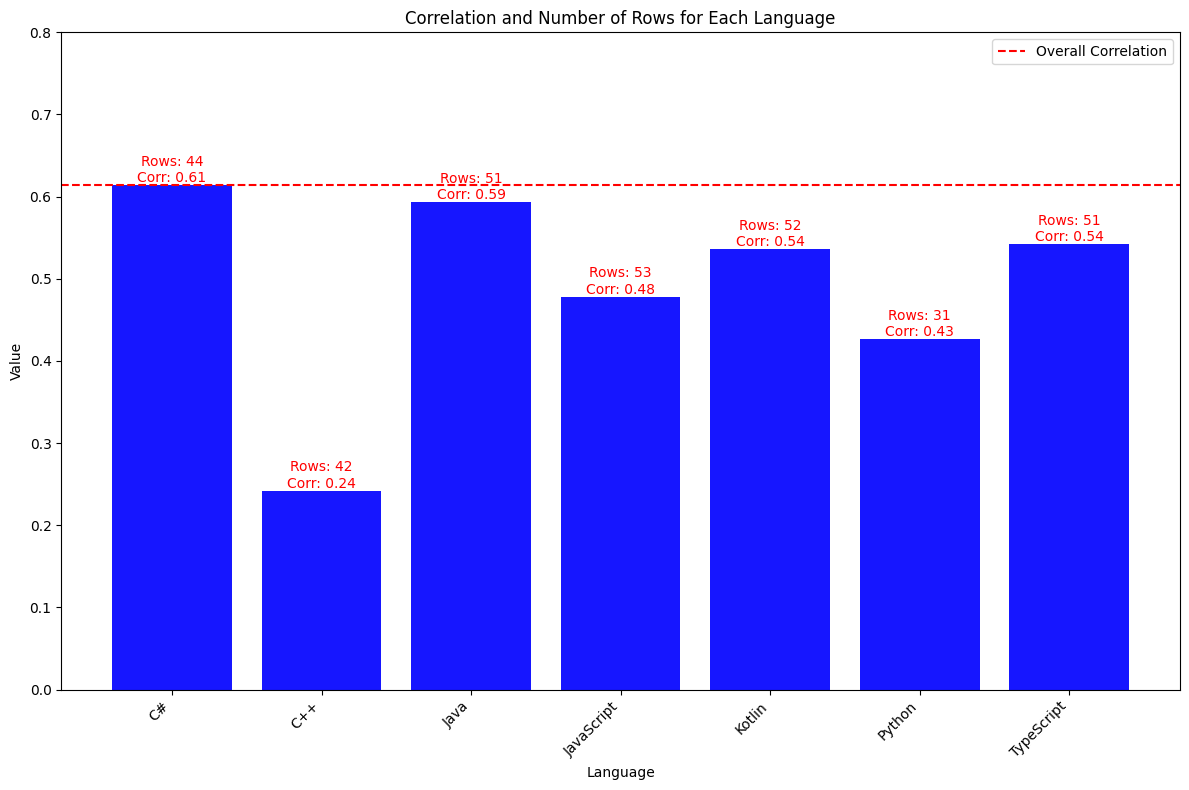

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(languages, correlation_coefficients, color='blue', alpha=0.7)
plt.axhline(y=overall_correlation_coefficient, color='red', linestyle='--', label='Overall Correlation')

# Add labels and title
plt.xlabel('Language')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between DevOps Score and Manual Score for Each Language')
plt.legend()

# Display correlation values on the bars
# for i, coef in enumerate(correlation_coefficients):
#     plt.text(i, coef, f'{coef:.2f}', ha='center', va='bottom')

for i, (coef, rows) in enumerate(zip(correlation_coefficients, num_rows_per_language)):
    plt.bar(languages[i], coef, color='blue', alpha=0.7, label='Correlation Coefficient')
    plt.text(i, coef, f'Rows: {rows}\nCorr: {coef:.2f}', ha='center', va='bottom', color='red')


plt.xlabel('Language')
plt.ylabel('Value')
plt.title('Correlation and Number of Rows for Each Language')

plt.ylim(0, 0.8)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

